**NAMA: HENDRI ANGKASA**<br>
**RAKAMIN ACADEMY BATCH 26**

#DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/Rakamin Mini Project/Predict Customer Clicked Ads Classification by Using Machine Learning/Clicked Ads Dataset.csv',index_col=0)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank


In [4]:
df_0 = df.copy()

## EXPLORATORY DATA ANALYSIS (EDA)

### Descriptive Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


In [6]:
df.rename(columns={'Male':'Gender'},inplace=True) #mengganti nama kolom

In [7]:
print('Jumlah kolom duplikat =',df.duplicated().sum())

Jumlah kolom duplikat = 0


Jumlah kolom dengan missing values

In [8]:
df.isnull().sum().sort_values(ascending=False)

Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Gender                       3
Age                          0
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [9]:
print('Percentage of Missing Values')
((df.isnull().sum())*100/len(df)).sort_values(ascending=False)

Percentage of Missing Values


Daily Time Spent on Site    1.3
Area Income                 1.3
Daily Internet Usage        1.1
Gender                      0.3
Age                         0.0
Timestamp                   0.0
Clicked on Ad               0.0
city                        0.0
province                    0.0
category                    0.0
dtype: float64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


### Grouping by Numerical and Categorical Data

In [11]:
nums = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
cats = ['Gender','Clicked on Ad','city','province','category']

#### Numerical Data

In [12]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


#### Categorical Data

In [13]:
df[cats].describe().transpose()

,count,unique,top,freq
Gender,997,2,Perempuan,518
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [14]:
for col in cats:
  print(f'Value count column {col}:')
  print(df[col].value_counts())
  print()

Value count column Gender:
Perempuan    518
Laki-Laki    479
Name: Gender, dtype: int64

Value count column Clicked on Ad:
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value count column city:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64

Value count column province:
Daerah Khusus Ibukot

### Univariate Analysis

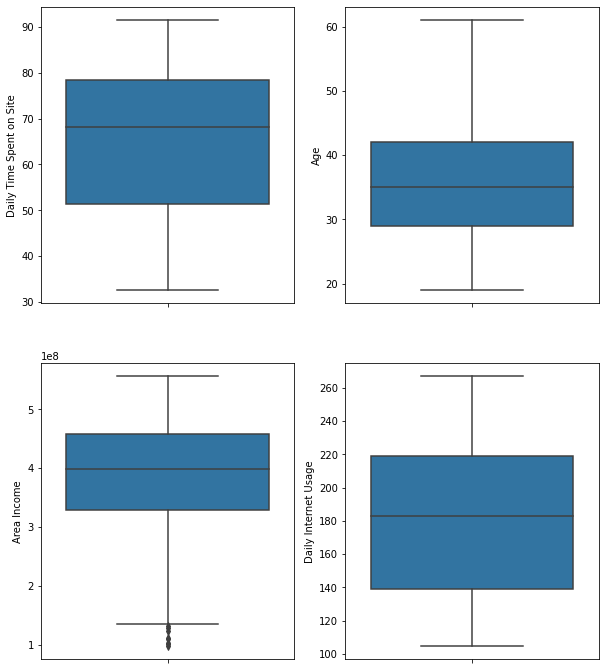

In [15]:
plt.figure(figsize=(10,12))

for i in range(len(nums)):
  plt.subplot(2,2,i+1)
  sns.boxplot(y=df[nums[i]])

Terdapat outlier pada kolom `Area Income`.

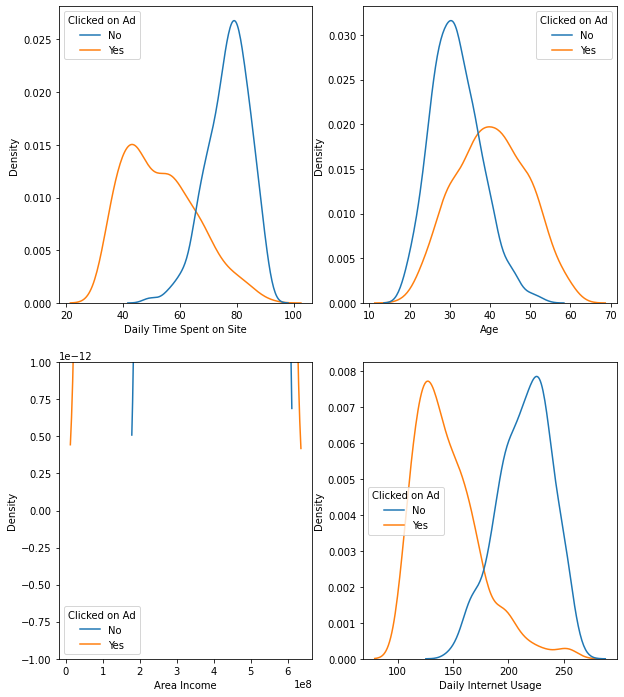

In [16]:
plt.figure(figsize=(10,12))

for i in range(len(nums)):
  plt.subplot(2,2,i+1)
  sns.kdeplot(x=df[nums[i]],hue=df['Clicked on Ad'])

Insight yang didapat:<br>
- Daily time spent on site dari user yang mengklik iklan cenderung lebih sedikit/kecil dibandingkan yang tidak mengklik iklan.<br>
- Ditinjau dari usia, user yang mengklik iklan cenderung lebih tua dibandingkan yang tidak mengklik iklan.<br>
- User yang mengklik iklan cenderung memiliki penggunaan internet harian yang lebih sedikit/singkat dibandingkan yang tidak mengklik iklan.

### Multivariate Analysis

In [17]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.000000,-0.331424,0.308266,0.518294
Age,-0.331424,1.000000,-0.179343,-0.370481
Area Income,0.308266,-0.179343,1.000000,0.338080
Daily Internet Usage,0.518294,-0.370481,0.338080,1.000000


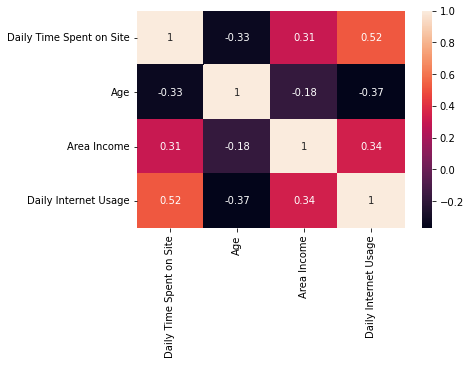

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Dari seluruh kolom yang ada, hanya kolom `Daily Internet Usage` dan `Daily Time Spent on Site` yang memiliki korelasi sedang (0.5 < r < 0.7).

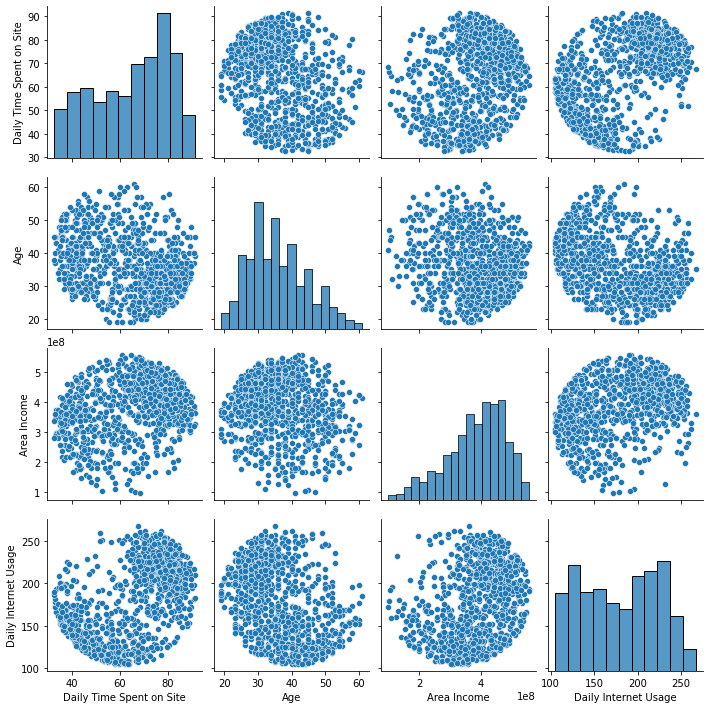

In [19]:
sns.pairplot(df)

plt.show()

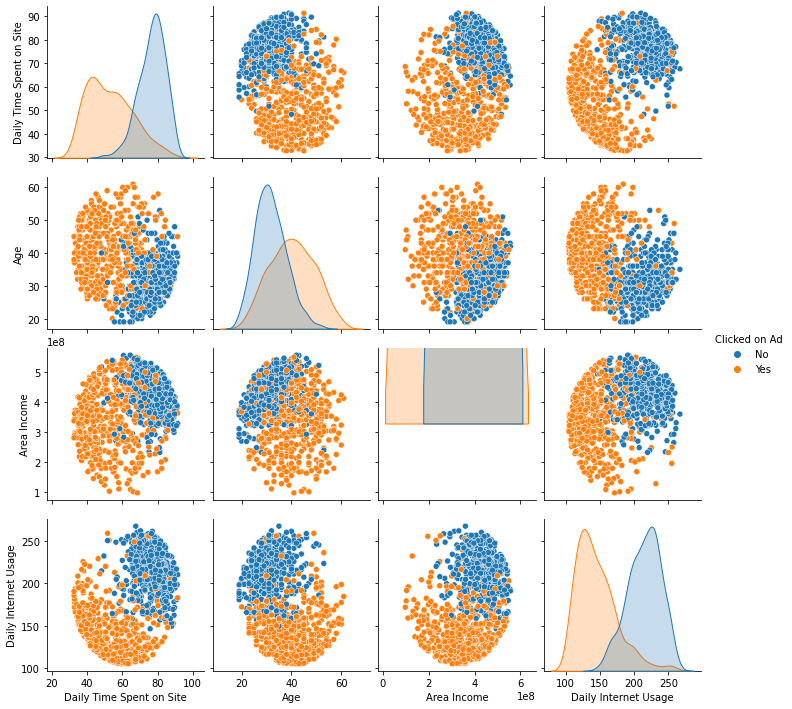

In [20]:
sns.pairplot(df,hue='Clicked on Ad')

plt.show()

Dari keseluruhan hubungan antar kolom, terlihat bahwa user yang mengklik iklan cenderung memiliki Daily Time Spent on Site dan Daily Internet Usage yang lebih rendah dibandingkan dengan yang tidak mengklik iklan.

## DATA PRE-PROCESSING

### Handling Missing Values

In [21]:
df.isnull().sum().sort_values(ascending=False)

Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Gender                       3
Age                          0
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

Percentage 

In [22]:
((df.isnull().sum())*100/len(df)).sort_values(ascending=False)

Daily Time Spent on Site    1.3
Area Income                 1.3
Daily Internet Usage        1.1
Gender                      0.3
Age                         0.0
Timestamp                   0.0
Clicked on Ad               0.0
city                        0.0
province                    0.0
category                    0.0
dtype: float64

- Kolom numerik dengan missing values tersebut diisi menggunakan nilai median (jika skew) dan mean (jika terdistribusi normal) -> `Daily Time Spent on Site` (median), `Area Income` (median) dan `Daily Internet Usage` (mean).<br>
- Untuk kolom `Gender` diisi dengan nilai modusnya yaitu "Perempuan".<br><br>
Pengisian kolom dengan missing values akan diisi setelah melakukan split data train dan test untuk mencegah data leak.

### Handling Duplicated Data

In [23]:
df.duplicated().sum()

0

### Extract Datetime Data

In [24]:
import datetime as dt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [25]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Week'] = df['Timestamp'].dt.week
df['Day'] = df['Timestamp'].dt.day

<ipython-input-25-5aafd6debe97>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Timestamp'].dt.week


In [26]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,12,27
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,4,14,4
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,3,10,13
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,1,1,10
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,6,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,2016,2,6,11
996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,2016,4,16,22
997,NaN,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,2016,2,5,1
998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,2016,3,12,24


### Feature Encoding

In [27]:
for col in cats:
  print(f'Value count column {col}:')
  print(df[col].value_counts())
  print()

Value count column Gender:
Perempuan    518
Laki-Laki    479
Name: Gender, dtype: int64

Value count column Clicked on Ad:
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value count column city:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64

Value count column province:
Daerah Khusus Ibukot

- Dikarenakan nilai unique yang cukup banyak pada kolom-kolom kategorik, maka kolom feature yang diencoding adalah `category` saja.<br>
- Kolom `Gender` dan `Clicked on Ad` dilakukan Label Encoding.<br>

In [28]:
mapping_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1
}

mapping_click = {
    'Yes' : 1,
    'No' : 0
}

df['Gender'] = df['Gender'].map(mapping_gender)
df['Clicked on Ad'] = df['Clicked on Ad'].map(mapping_click)

In [29]:
for i in ['category']:
  ohe = pd.get_dummies(df[i],prefix=i)
  df = df.join(ohe)

### Drop Features

In [30]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0.0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,...,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1.0,2016-04-04 01:39:00,0,Denpasar,Bali,Food,...,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0.0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,Electronic,...,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1.0,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,House,...,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0.0,2016-06-03 03:36:00,0,Medan,Sumatra Utara,Finance,...,0,0,0,1,0,0,0,0,0,0


In [31]:
df.drop(['city','province','category','Timestamp'],axis = 1,inplace=True)

In [32]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Year,Month,Week,Day,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0.0,0,2016,3,12,27,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1.0,0,2016,4,14,4,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0.0,0,2016,3,10,13,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1.0,0,2016,1,1,10,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0.0,0,2016,6,22,3,0,0,0,1,0,0,0,0,0,0


### Split Data

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop(['Clicked on Ad'],axis=1) #feature
y = df[['Clicked on Ad']] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

#### Filling Missing Values

In [34]:
X_train.isnull().sum()

Daily Time Spent on Site    7
Age                         0
Area Income                 9
Daily Internet Usage        5
Gender                      2
Year                        0
Month                       0
Week                        0
Day                         0
category_Bank               0
category_Electronic         0
category_Fashion            0
category_Finance            0
category_Food               0
category_Furniture          0
category_Health             0
category_House              0
category_Otomotif           0
category_Travel             0
dtype: int64

In [35]:
X_train['Daily Time Spent on Site'].fillna(X_train['Daily Time Spent on Site'].median(),inplace=True)
X_train['Area Income'].fillna(X_train['Area Income'].median(),inplace=True)
X_train['Daily Internet Usage'].fillna(X_train['Daily Internet Usage'].mean(),inplace=True)
X_train['Gender'].fillna(0,inplace=True)

In [36]:
X_test.isnull().sum()

Daily Time Spent on Site    6
Age                         0
Area Income                 4
Daily Internet Usage        6
Gender                      1
Year                        0
Month                       0
Week                        0
Day                         0
category_Bank               0
category_Electronic         0
category_Fashion            0
category_Finance            0
category_Food               0
category_Furniture          0
category_Health             0
category_House              0
category_Otomotif           0
category_Travel             0
dtype: int64

In [37]:
X_test['Daily Time Spent on Site'].fillna(X_test['Daily Time Spent on Site'].median(),inplace=True)
X_test['Area Income'].fillna(X_test['Area Income'].median(),inplace=True)
X_test['Daily Internet Usage'].fillna(X_test['Daily Internet Usage'].mean(),inplace=True)
X_test['Gender'].fillna(0,inplace=True)

# MODELLING

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
from sklearn import metrics

Score yang akan kita maksimalkan di modelling ini adalah **Precision** dimana kita akan fokus mengurangi **False Positive** untuk mengurangi terjadinya prediksi user akan mengklik iklan sedangkan kenyatannya tidak, dengan tujuan untuk mengurangi cost yang kita gunakan untuk iklan.

## Without Standardization Data

In [40]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

def confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                         columns = [i for i in ['Predict 1','Predict 0']])
    plt.figure(figsize=(7,5))
    sns.heatmap(df_cm,annot=True,fmt = 'g')

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index = X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize = (10,8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### K-Nearest Neighbor

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy (Train Set): 0.77
Accuracy (Test Set): 0.65
Precision (Train Set): 0.79
Precision (Test Set): 0.67
Recall (Train Set): 0.72
Recall (Test Set): 0.64
F1-Score (Train Set): 0.75
F1-Score (Test Set): 0.65
roc_auc (train-proba): 0.84
roc_auc (test-proba): 0.71


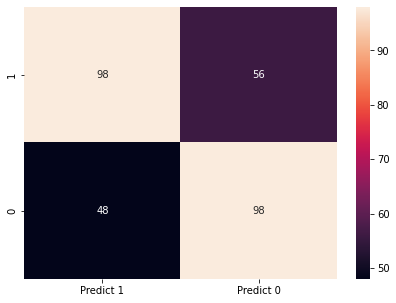

In [42]:
confusion_matrix(knn)

#### **Hyperparameter  Tuning**

In [43]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p = [1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train,y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='precision', random_state=7, cv=5)
rs.fit(X_train,y_train)
eval_classification(rs)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.72
Precision (Train Set): 0.80
Precision (Test Set): 0.78
Recall (Train Set): 0.61
Recall (Test Set): 0.62
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.69
roc_auc (train-proba): 0.80
roc_auc (test-proba): 0.74


In [44]:
show_best_hyperparameter(rs)

{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}


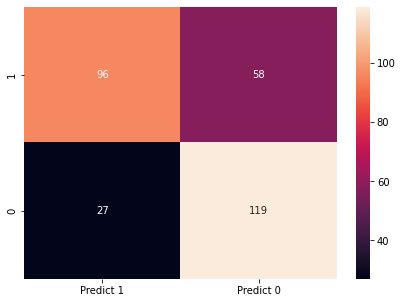

In [45]:
confusion_matrix(rs)

### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=7)
dt.fit(X_train,y_train)

eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.92
Precision (Train Set): 1.00
Precision (Test Set): 0.90
Recall (Train Set): 1.00
Recall (Test Set): 0.95
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.93
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.92


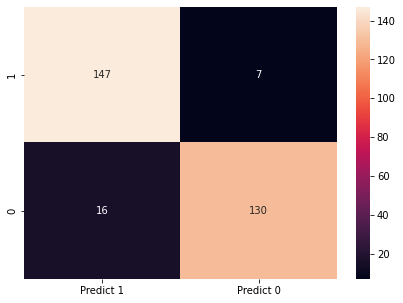

In [47]:
confusion_matrix(dt)

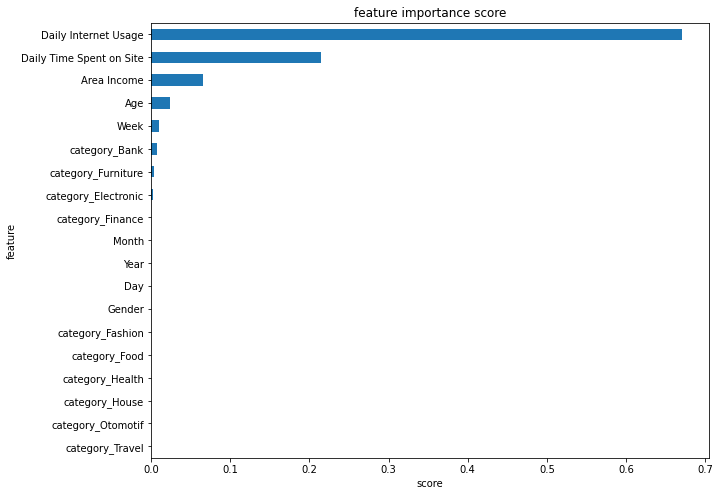

In [48]:
show_feature_importance(dt)

#### **Hyperparameter Tuning**

param value: 1;Precision (Test Set): 0.97
param value: 3;Precision (Test Set): 0.97
param value: 5;Precision (Test Set): 0.94
param value: 7;Precision (Test Set): 0.93
param value: 9;Precision (Test Set): 0.93
param value: 11;Precision (Test Set): 0.95
param value: 13;Precision (Test Set): 0.94
param value: 15;Precision (Test Set): 0.94
param value: 17;Precision (Test Set): 0.94
param value: 19;Precision (Test Set): 0.94
param value: 21;Precision (Test Set): 0.94
param value: 23;Precision (Test Set): 0.94
param value: 25;Precision (Test Set): 0.94
param value: 27;Precision (Test Set): 0.94
param value: 30;Precision (Test Set): 0.94


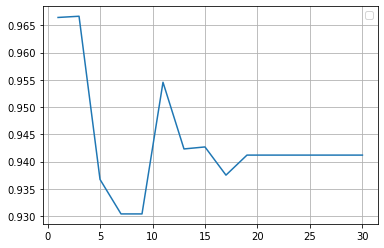

In [49]:
#param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
#param_values = [int(x) for x in np.linspace(2, 30, 20)] # min_samples_split
param_values = [int(x) for x in np.linspace(1, 30, 15)] # min_samples_leaf

precision_scores = []

for c in param_values:
    model = DecisionTreeClassifier(min_samples_leaf=c,min_samples_split=24,max_depth=6,random_state=7)
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    precision = precision_score(y_test,y_pred)
    precision_scores.append(precision)

    print('param value: ' + str(c) + ';Precision (Test Set): %.2f' % precision_score(y_test, y_pred))

plt.plot(param_values,precision_scores)
plt.grid()
plt.legend()
plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_leaf=2,min_samples_split=24,max_depth=6,random_state=7)
dt.fit(X_train,y_train)

eval_classification(dt)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.95
Precision (Train Set): 0.98
Precision (Test Set): 0.96
Recall (Train Set): 0.95
Recall (Test Set): 0.94
F1-Score (Train Set): 0.97
F1-Score (Test Set): 0.95
roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.96


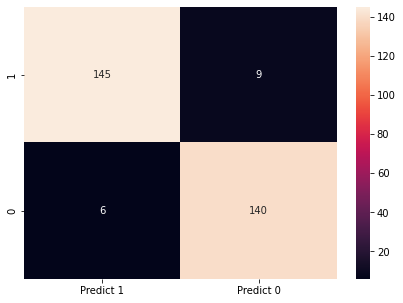

In [51]:
confusion_matrix(dt)

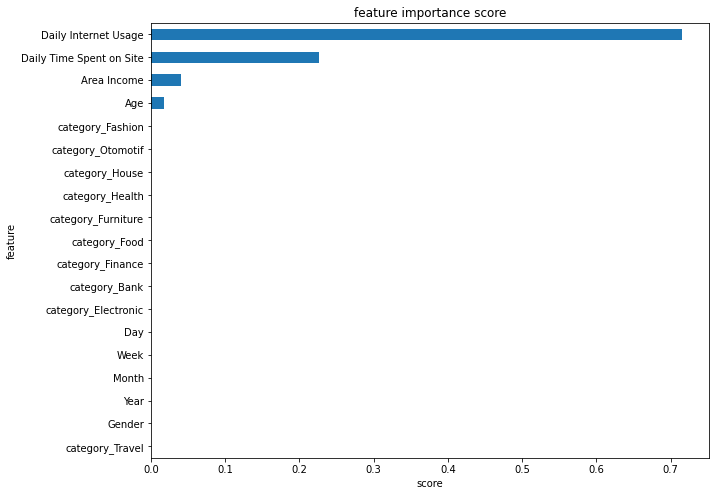

In [52]:
show_feature_importance(dt)

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.97
Precision (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Train Set): 1.00
Recall (Test Set): 0.98
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.97
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99


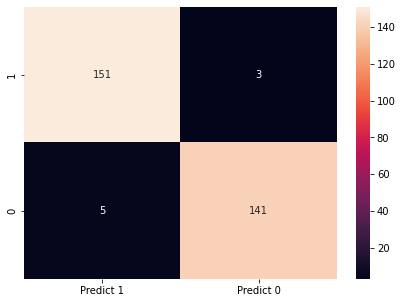

In [54]:
confusion_matrix(rf)

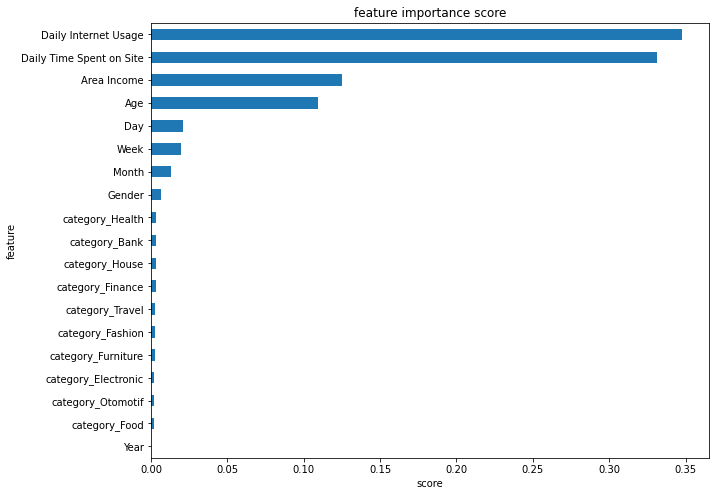

In [55]:
show_feature_importance(rf)

#### **Hyperparameter Tuning**

param value: 1;Precision (Test Set): 0.96
param value: 3;Precision (Test Set): 0.96
param value: 5;Precision (Test Set): 0.96
param value: 7;Precision (Test Set): 0.97
param value: 9;Precision (Test Set): 0.97
param value: 11;Precision (Test Set): 0.96
param value: 13;Precision (Test Set): 0.96
param value: 15;Precision (Test Set): 0.97
param value: 17;Precision (Test Set): 0.97
param value: 19;Precision (Test Set): 0.97
param value: 21;Precision (Test Set): 0.97
param value: 23;Precision (Test Set): 0.97


param value: 25;Precision (Test Set): 0.97
param value: 27;Precision (Test Set): 0.97
param value: 30;Precision (Test Set): 0.97


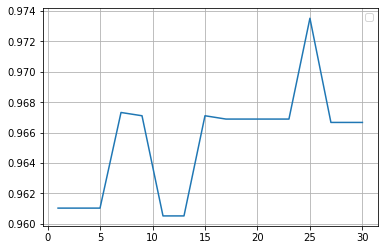

In [56]:
from sklearn.metrics import recall_score
#param_values = [int(x) for x in np.linspace(2, 200, 50)] # n_estimators
#param_values = [int(x) for x in np.linspace(2, 10, 9)] # max_depth
#param_values = [int(x) for x in np.linspace(2, 100, 50)] # min_samples_leaf

precision_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=30, min_samples_leaf=c,max_depth=3,random_state=42)
    model.fit(X_train, y_train)

    # eval on recall
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)

    print('param value: ' + str(c) + ';Precision (Test Set): %.2f' % precision_score(y_test, y_pred))

plt.plot(param_values, precision_scores)
plt.grid()
plt.legend()
plt.show()

In [57]:
rf = RandomForestClassifier(n_estimators=30, min_samples_leaf=70,max_depth=3,random_state=42)
rf.fit(X_train,y_train)

eval_classification(rf)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.97
Precision (Train Set): 0.97
Precision (Test Set): 0.97
Recall (Train Set): 0.94
Recall (Test Set): 0.96
F1-Score (Train Set): 0.95
F1-Score (Test Set): 0.97
roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.99


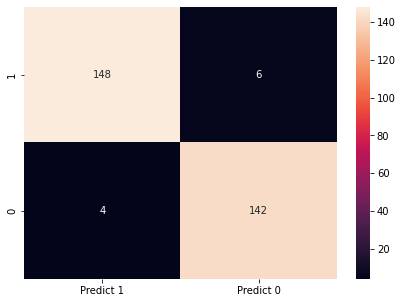

In [58]:
confusion_matrix(rf)

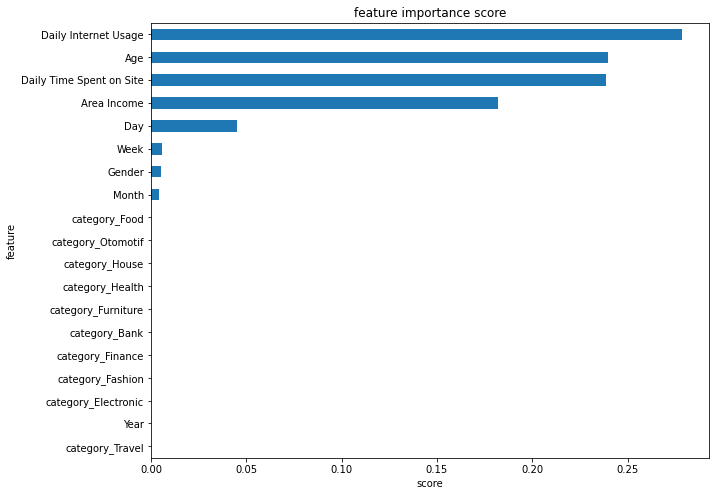

In [59]:
show_feature_importance(rf)

### XGBoost

In [60]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train,y_train)

eval_classification(xg)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.97
Precision (Train Set): 1.00
Precision (Test Set): 0.96
Recall (Train Set): 0.99
Recall (Test Set): 0.97
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.97
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99


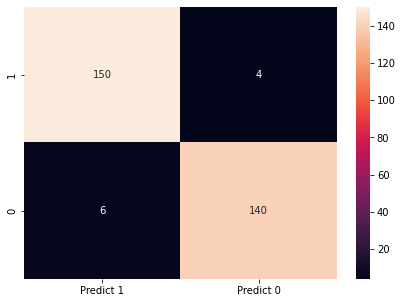

In [61]:
confusion_matrix(xg)

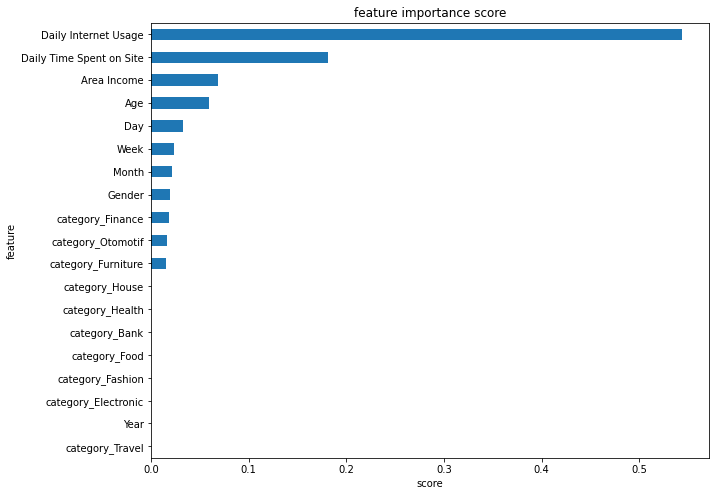

In [62]:
show_feature_importance(xg)

#### **Hyperparameter Tuning**

In [63]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

param_grid = { 
    # Learning rate shrinks the weights to make the boosting process more conservative
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    # Maximum depth of the tree, increasing it increases the model complexity.
    "max_depth": range(3,100,1),
    # Gamma specifies the minimum loss reduction required to make a split.
    "gamma": [i/10.0 for i in range(0,5)],
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0.00001, 0.01, 0.1, 1, 10, 100],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0.00001, 0.01, 0.1, 1, 10, 100]}
# Set up score
scoring = ['precision']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)


random_search = RandomizedSearchCV(estimator=xg, 
                           param_distributions=param_grid, 
                           n_iter=100,
                           scoring=scoring, 
                           refit='precision', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0, random_state=7)

random_result = random_search.fit(X_train, y_train)

eval_classification(random_result)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.96
Precision (Train Set): 0.97
Precision (Test Set): 0.97
Recall (Train Set): 0.92
Recall (Test Set): 0.95
F1-Score (Train Set): 0.95
F1-Score (Test Set): 0.96
roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.99


In [64]:
show_best_hyperparameter(random_result)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.3, 'gamma': 0.3, 'learning_rate': 0.0001, 'max_delta_step': 0, 'max_depth': 96, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 10, 'reg_lambda': 1e-05, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


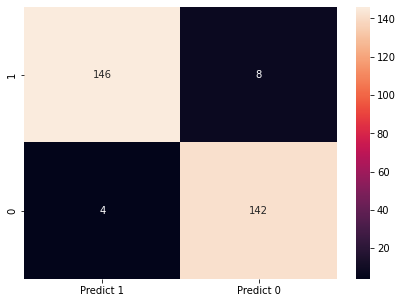

In [65]:
confusion_matrix(random_search)

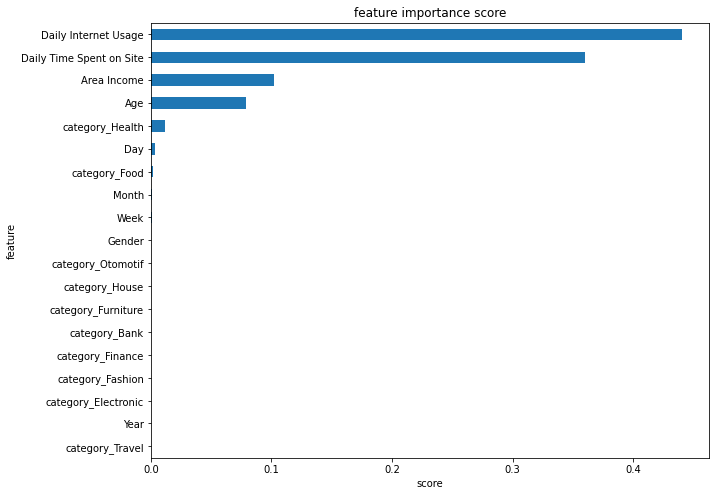

In [66]:
xg = XGBClassifier(base_score= 0.5,booster='gbtree', colsample_bylevel= 1, colsample_bynode=1, colsample_bytree= 0.3, gamma= 0.3, 
                   learning_rate= 0.0001,max_delta_step=0, max_depth=96, min_child_weight= 1, missing= None, n_estimators= 100, n_jobs= 1,
                   nthread=None, objective='binary:logistic',random_state=7, reg_alpha=10, reg_lambda=1e-05, scale_pos_weight=1, seed= None,
                   silent=None, subsample=1, verbosity=1)
xg.fit(X_train,y_train)
show_feature_importance(xg)

## With Standardization Data

In [67]:
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Year,Month,Week,Day,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
822,73.21,30,357093590.0,252.60,1.0,2016,5,19,12,0,0,0,0,0,0,0,0,0,1
188,84.73,30,278883850.0,153.76,0.0,2016,2,7,21,0,0,0,1,0,0,0,0,0,0
251,61.22,45,447186670.0,119.03,1.0,2016,1,1,5,0,0,1,0,0,0,0,0,0,0
71,69.01,46,521806670.0,222.63,0.0,2016,7,27,7,0,0,1,0,0,0,0,0,0,0
664,81.37,33,464884280.0,215.04,0.0,2016,1,2,15,0,0,1,0,0,0,0,0,0,0


In [68]:
Xt_train = X_train.copy()
Xt_test = X_test.copy()

In [69]:
from sklearn.preprocessing import StandardScaler

Xt_train['Daily Time Spent on Site'] = StandardScaler().fit_transform(Xt_train['Daily Time Spent on Site'].values.reshape(len(X_train),1))
Xt_test['Daily Time Spent on Site'] = StandardScaler().fit_transform(Xt_test['Daily Time Spent on Site'].values.reshape(len(X_test),1))

Xt_train['Age'] = StandardScaler().fit_transform(Xt_train['Age'].values.reshape(len(X_train),1))
Xt_test['Age'] = StandardScaler().fit_transform(Xt_test['Age'].values.reshape(len(X_test),1))

Xt_train['Area Income'] = StandardScaler().fit_transform(Xt_train['Area Income'].values.reshape(len(X_train),1))
Xt_test['Area Income'] = StandardScaler().fit_transform(Xt_test['Area Income'].values.reshape(len(X_test),1))

Xt_train['Daily Internet Usage'] = StandardScaler().fit_transform(Xt_train['Daily Internet Usage'].values.reshape(len(X_train),1))
Xt_test['Daily Internet Usage'] = StandardScaler().fit_transform(Xt_test['Daily Internet Usage'].values.reshape(len(X_test),1))

Xt_train['Year'] = StandardScaler().fit_transform(Xt_train['Year'].values.reshape(len(X_train),1))
Xt_test['Year'] = StandardScaler().fit_transform(Xt_test['Year'].values.reshape(len(X_test),1))

Xt_train['Month'] = StandardScaler().fit_transform(Xt_train['Month'].values.reshape(len(X_train),1))
Xt_test['Month'] = StandardScaler().fit_transform(Xt_test['Month'].values.reshape(len(X_test),1))

Xt_train['Week'] = StandardScaler().fit_transform(Xt_train['Week'].values.reshape(len(X_train),1))
Xt_test['Week'] = StandardScaler().fit_transform(Xt_test['Week'].values.reshape(len(X_test),1))

Xt_train['Day'] = StandardScaler().fit_transform(Xt_train['Day'].values.reshape(len(X_train),1))
Xt_test['Day'] = StandardScaler().fit_transform(Xt_test['Day'].values.reshape(len(X_test),1))

In [70]:
Xt_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Year,Month,Week,Day,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
822,0.514493,-0.697671,-0.328433,1.643236,1.0,0.0,0.619023,0.376545,-0.393700,0,0,0,0,0,0,0,0,0,1
188,1.237318,-0.697671,-1.170211,-0.628231,0.0,0.0,-0.945295,-0.866763,0.641920,0,0,0,1,0,0,0,0,0,0
251,-0.237822,1.059898,0.641246,-1.426369,1.0,0.0,-1.466735,-1.488417,-1.199182,0,0,1,0,0,0,0,0,0,0
71,0.250963,1.177069,1.444388,0.954488,0.0,0.0,1.661902,1.205416,-0.969045,0,0,1,0,0,0,0,0,0,0
664,1.026494,-0.346158,0.831727,0.780060,0.0,0.0,-1.466735,-1.384808,-0.048493,0,0,1,0,0,0,0,0,0,0


In [71]:
Xt_test.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Year,Month,Week,Day,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
778,-0.800239,0.842789,-2.920800,0.327596,0.0,0.0,0.603235,0.453677,0.382134,0,0,1,0,0,0,0,0,0,0
334,1.408631,0.414071,0.905556,0.259153,1.0,0.0,-0.425007,-0.461131,0.382134,0,0,1,0,0,0,0,0,0,0
271,0.534519,0.092532,1.449142,1.026455,1.0,0.0,1.117356,0.860259,0.382134,0,0,0,0,0,0,1,0,0,0
802,-0.933911,1.485867,-2.105466,-0.794743,0.0,0.0,-0.425007,-0.562777,-0.638401,0,0,0,0,1,0,0,0,0,0
216,-0.217060,1.807406,-1.401758,-1.167635,1.0,0.0,-0.425007,-0.461131,-0.184830,0,0,0,0,0,0,1,0,0,0


In [72]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(Xt_test)
    y_pred_train = model.predict(Xt_train)
    y_pred_proba = model.predict_proba(Xt_test)
    y_pred_proba_train = model.predict_proba(Xt_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

def confusion_matrix(model):
    y_pred = model.predict(Xt_test)
    cm = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                         columns = [i for i in ['Predict 1','Predict 0']])
    plt.figure(figsize=(7,5))
    sns.heatmap(df_cm,annot=True,fmt = 'g')

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index = X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize = (10,8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### K-Nearest Neighbor

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(Xt_train, y_train)

eval_classification(knn)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 0.99
Recall (Train Set): 0.93
Recall (Test Set): 0.94
F1-Score (Train Set): 0.96
F1-Score (Test Set): 0.96
roc_auc (train-proba): 0.99
roc_auc (test-proba): 1.00


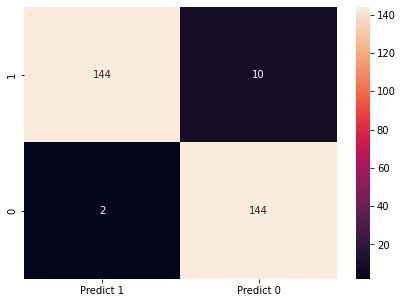

In [74]:
confusion_matrix(knn)

Hasil KNN disini sudah sangat baik untuk Precision sehingga tidak perlu hyperparameter tuning.

### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=7)
dt.fit(Xt_train,y_train)

eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.92
Recall (Train Set): 1.00
Recall (Test Set): 0.96
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.94


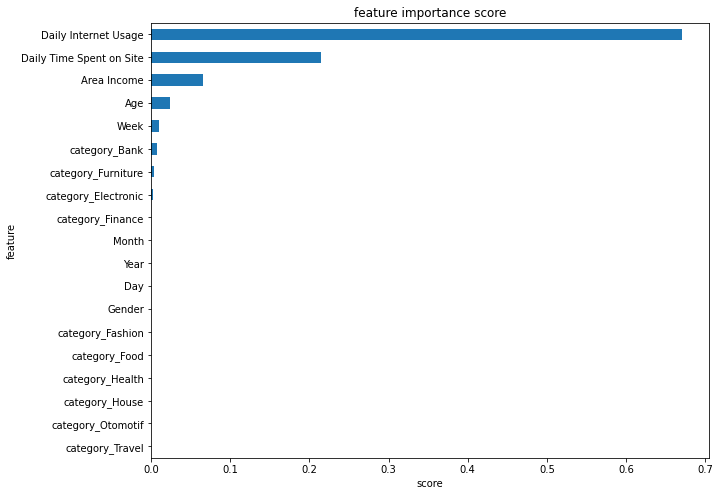

In [76]:
show_feature_importance(dt)

#### **Hyperparameter Tuning**

In [77]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

param_grid = { 
    "min_samples_leaf":[int(x) for x in np.linspace(2, 100, 50)],
    "min_samples_split":[int(x) for x in np.linspace(2, 30, 20)],
    "max_depth": [int(x) for x in np.linspace(2, 100, 50)]
    }
# Set up score
scoring = ['precision']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)


random_search = RandomizedSearchCV(estimator=dt, 
                           param_distributions=param_grid, 
                           n_iter=100,
                           scoring=scoring, 
                           refit='precision', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0, random_state=7)

random_result = random_search.fit(Xt_train, y_train)

eval_classification(random_result)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.95
Precision (Train Set): 0.97
Precision (Test Set): 0.95
Recall (Train Set): 0.93
Recall (Test Set): 0.94
F1-Score (Train Set): 0.95
F1-Score (Test Set): 0.95
roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.98


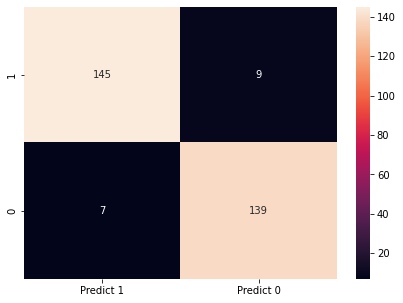

In [78]:
confusion_matrix(random_result)

In [79]:
show_best_hyperparameter(random_result)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 68, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 12, 'min_samples_split': 27, 'min_weight_fraction_leaf': 0.0, 'random_state': 7, 'splitter': 'best'}


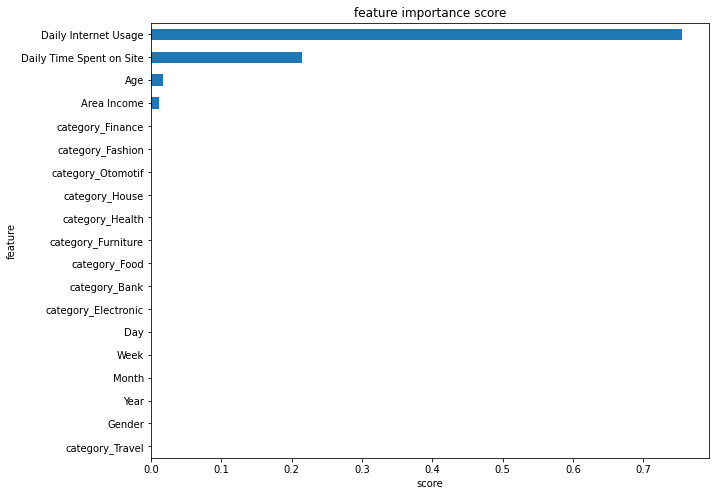

In [80]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_leaf=12,min_samples_split=27,max_depth=68,random_state=7)
dt.fit(Xt_train,y_train)

show_feature_importance(dt)

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(Xt_train,y_train)

eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.97
Precision (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Train Set): 1.00
Recall (Test Set): 0.97
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.97
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99


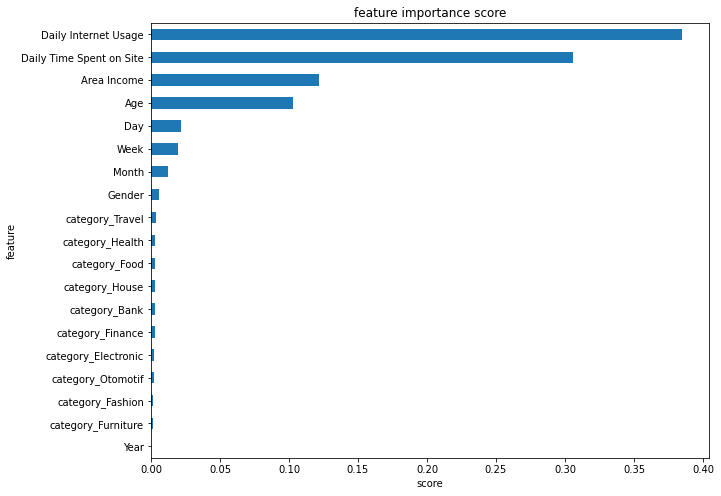

In [82]:
show_feature_importance(rf)

#### **Hyperparameter Tuning**

In [83]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

param_grid = { 
    "min_samples_leaf":[int(x) for x in np.linspace(2, 100, 50)],
    "n_estimators":[int(x) for x in np.linspace(2, 200, 50)],
    "max_depth": [int(x) for x in np.linspace(2, 100, 50)],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "min_samples_split": [int(x) for x in np.linspace(2, 30, 20)]
    }
# Set up score
scoring = ['precision']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)


random_search = RandomizedSearchCV(estimator=rf, 
                           param_distributions=param_grid, 
                           n_iter=200,
                           scoring=scoring, 
                           refit='precision', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0, random_state=7)

random_result = random_search.fit(Xt_train, y_train)

eval_classification(random_result)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.97
Precision (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Train Set): 0.99
Recall (Test Set): 0.97
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.97
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99


In [84]:
show_best_hyperparameter(random_result)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 58, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 147, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


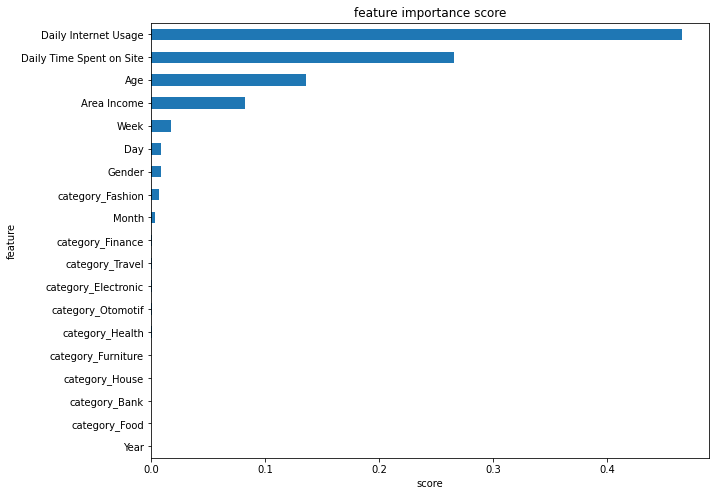

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy',max_depth=2,min_samples_leaf=14,min_samples_split=16,n_estimators=103)
rf.fit(Xt_train,y_train)

show_feature_importance(rf)

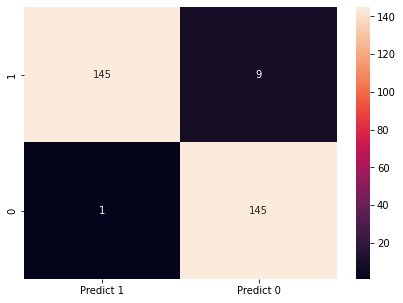

In [86]:
confusion_matrix(rf)

### XGBoost

In [87]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(Xt_train,y_train)

eval_classification(xg)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.96
Precision (Train Set): 1.00
Precision (Test Set): 0.97
Recall (Train Set): 0.99
Recall (Test Set): 0.96
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.96
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99


####**Hyperparameter Tuning**

In [88]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

param_grid = { 
    # Learning rate shrinks the weights to make the boosting process more conservative
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    # Maximum depth of the tree, increasing it increases the model complexity.
    "max_depth": range(3,50,3),
    # Gamma specifies the minimum loss reduction required to make a split.
    "gamma": [i/10.0 for i in range(0,5)],
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0.00001, 0.01, 0.1, 1, 10, 100],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0.00001, 0.01, 0.1, 1, 10, 100]}
# Set up score
scoring = ['precision']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)


random_search = RandomizedSearchCV(estimator=xg, 
                           param_distributions=param_grid, 
                           n_iter=100,
                           scoring=scoring, 
                           refit='precision', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0, random_state=7)

random_result = random_search.fit(Xt_train, y_train)

eval_classification(random_result)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.96
Precision (Train Set): 0.98
Precision (Test Set): 0.99
Recall (Train Set): 0.93
Recall (Test Set): 0.93
F1-Score (Train Set): 0.96
F1-Score (Test Set): 0.96
roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.99


In [89]:
show_best_hyperparameter(random_result)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.001, 'max_delta_step': 0, 'max_depth': 48, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 1, 'reg_lambda': 10, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


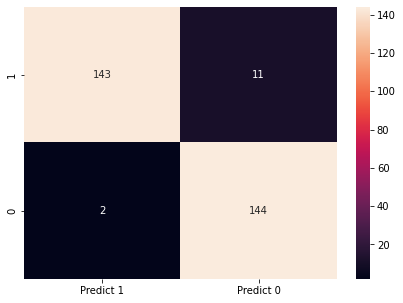

In [90]:
confusion_matrix(random_search)

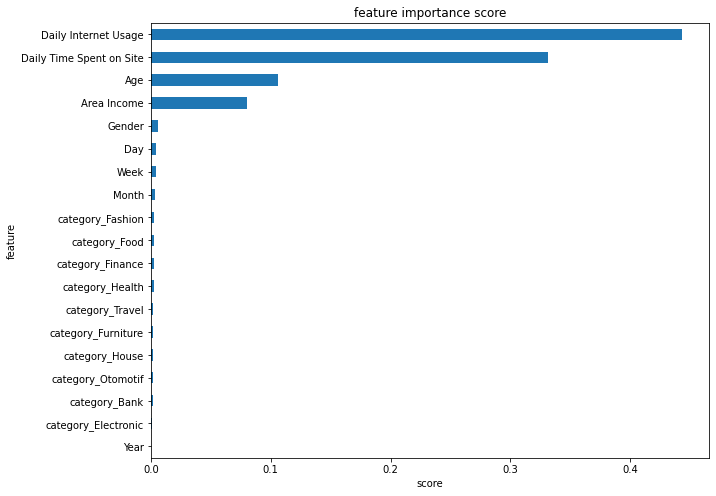

In [91]:
xg = XGBClassifier(base_score= 0.5,booster='gbtree', colsample_bylevel= 1, colsample_bynode=1, colsample_bytree= 0.3, gamma= 0.1, 
                   learning_rate= 0.001,max_delta_step=0, max_depth=48, min_child_weight= 1, missing= None, n_estimators= 100, n_jobs= 1,
                   nthread=None, objective='binary:logistic',random_state=7, reg_alpha=1, reg_lambda=10, scale_pos_weight=1, seed= None,
                   silent=None, subsample=1, verbosity=1)

xg.fit(Xt_train,y_train)
show_feature_importance(xg)

## Choosing Model

**Kesimpulan dari Modeling yang telah dilakukan:**<br>
- Dalam evaluasi Machine Learning, metrics yang digunakan disini adalah “Precision” yang dimana kita berusaha untuk mengurangi jumlah False Positive yang merupakan keadaan dimana kita memprediksi bahwa user terakit akan mengklik iklan, namun kenyataannya tidak. Hal ini berakibat pada ruginya perusahaan dalam melakukan penayangan iklan kepada user yang tidak mengklik tersebut. Oleh karena itu, kita berusaha untuk menurunkan nilai False Positive sekecil mungkin agar cost dalam penayangan iklan lebih optimal. <br>
- Berdasarkan hasil eksperimen 1 (tanpa standardisasi) dan eksperimen 2 (dengan standardisasi), hasil evaluasi metrics pada algoritma K-Nearest Neighbor sangat berbeda signifikan. Hasil yang lebih baik didapat pada eksperimen 2 KNN dimana menghasilkan nilai precision 99%. Hal ini disebabkan karena KNN merupakan algoritma yang sensitif terhadap scaling dari data (karena pada KNN terdapat perhitungan Euclidean distance). Sedangkan untuk eksperimen 1 dan 2 dari model Decision Tree, Random Forest dan XGBoost tidak terlalu berbeda karena ketiga model tersebut memang tidak sensitif terhadap data scaling.<br>
- Dari keseluruhan modeling yang telah dilakukan, jenis algoritma yang dipilih adalah pada eksperimen 2 yaitu Random Forest (dengan Hyperparameter Tuning) dengan Precision sebesar 98% dan 3 False Positive. Walaupun pada eksperimen 2 model KNN dan XGBoost memiliki nilai Precision 99%, kedua model tersebut tidak dipilih karena terdapat sedikit indikasi underfitting dari keseluruhan metrics yang ada (score train < test).<br>
- 2 fitur utama (dari feature importance) yaitu Daily Internet Usage dan Daily Time Spent on Site.


# EDA ON FEATURE IMPORTANCE 

## Daily Internet Usage

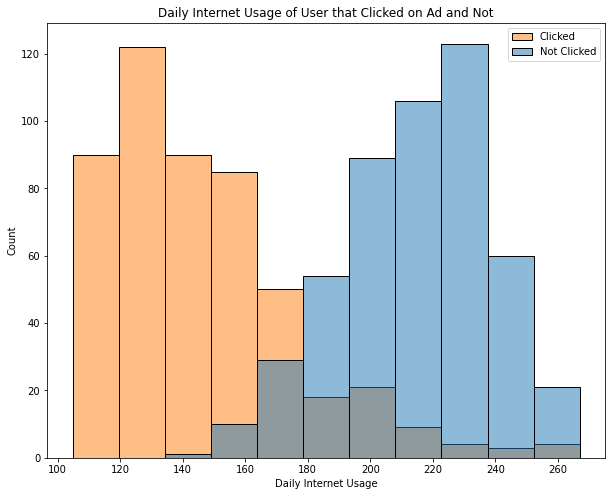

In [99]:
plt.figure(figsize=(10,8))

sns.histplot(x='Daily Internet Usage',hue='Clicked on Ad',data=df)

plt.legend(labels=['Clicked','Not Clicked'])
plt.title('Daily Internet Usage of User that Clicked on Ad and Not')
plt.show()

Customer yang mengklik iklan cenderung merupakan customer dengan penggunaan internet harian yang lebih sedikit dibanding yang tidak mengklik iklan. Oleh karena itu, tim Data Scientist diharapkan dapat membuat sebuah sistem yang dapat menargetkan customer dengan penggunaan internet selama 100-170 menit/hari untuk pengiklanan dari perusahaan. Hal ini dapat mengoptimasi biaya pemasangan iklan di platform menjadi lebih baik karena langsung menargetkan ke customer yang cenderung mengklik iklan dibanding sebelumnya.

##Daily Time Spent on Site

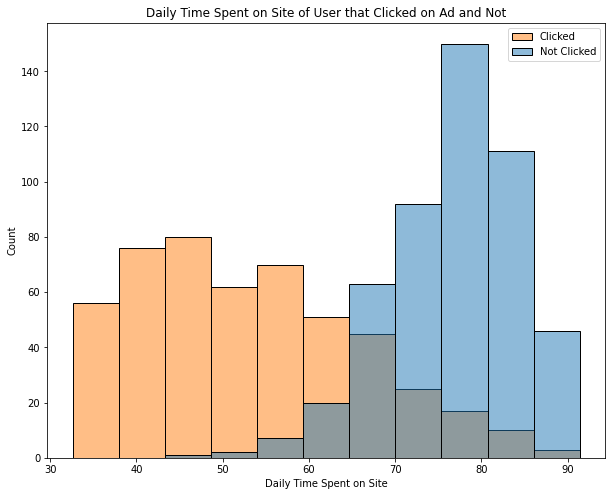

In [100]:
plt.figure(figsize=(10,8))

sns.histplot(x='Daily Time Spent on Site',hue='Clicked on Ad',data=df)

plt.legend(labels=['Clicked','Not Clicked'])
plt.title('Daily Time Spent on Site of User that Clicked on Ad and Not')
plt.show()

Customer yang mengklik iklan cenderung merupakan customer dengan nilai Daily Time Spent on Site yang lebih sedikit dibanding yang tidak mengklik iklan. Oleh karena itu, tim Data Scientist diharapkan dapat membuat sebuah sistem yang dapat menargetkan customer dengan nilai Daily Time Spent on Site selama 30-60 menit/hari untuk pengiklanan dari perusahaan. Hal ini dapat mengoptimasi biaya pemasangan iklan di platform menjadi lebih baik karena langsung menargetkan ke customer yang cenderung mengklik iklan dibanding sebelumnya.